In [2]:
#Import Libraries
import glob
from keras.models import Sequential, load_model
import numpy as np
import pandas as pd
import seaborn as sns
import keras as k
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping
from tensorflow.keras.optimizers import Adam

In [3]:
df_train = pd.read_csv('../input/chronic-kidney-disease/kidney_disease_train.csv')

df_test = pd.read_csv('../input/chronic-kidney-disease/kidney_disease_test.csv')

In [4]:
df_train

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,157,62.0,70.0,1.025,3.0,0.0,normal,abnormal,notpresent,notpresent,...,39.0,7900,3.9,yes,yes,no,good,no,no,ckd
1,109,54.0,70.0,NaN,NaN,NaN,NaN,NaN,notpresent,notpresent,...,NaN,NaN,NaN,no,yes,no,good,no,no,ckd
2,17,47.0,80.0,NaN,NaN,NaN,NaN,NaN,notpresent,notpresent,...,NaN,NaN,NaN,yes,no,no,poor,no,no,ckd
3,347,43.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,43.0,7200,5.5,no,no,no,good,no,no,notckd
4,24,42.0,100.0,1.015,4.0,0.0,normal,abnormal,notpresent,present,...,39.0,8300,4.6,yes,no,no,poor,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,71,46.0,60.0,1.010,1.0,0.0,normal,normal,notpresent,notpresent,...,28.0,14600,3.2,yes,yes,no,good,no,no,ckd
276,106,50.0,90.0,NaN,NaN,NaN,NaN,NaN,notpresent,notpresent,...,17.0,6500,NaN,yes,yes,no,good,yes,yes,ckd
277,270,23.0,80.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,41.0,7200,5.0,no,no,no,good,no,no,notckd
278,348,38.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,44.0,7300,6.4,no,no,no,good,no,no,notckd


In [5]:
df = pd.concat([df_train, df_test])
df

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,157,62.0,70.0,1.025,3.0,0.0,normal,abnormal,notpresent,notpresent,...,39,7900,3.9,yes,yes,no,good,no,no,ckd
1,109,54.0,70.0,NaN,NaN,NaN,NaN,NaN,notpresent,notpresent,...,NaN,NaN,NaN,no,yes,no,good,no,no,ckd
2,17,47.0,80.0,NaN,NaN,NaN,NaN,NaN,notpresent,notpresent,...,NaN,NaN,NaN,yes,no,no,poor,no,no,ckd
3,347,43.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,43,7200,5.5,no,no,no,good,no,no,notckd
4,24,42.0,100.0,1.015,4.0,0.0,normal,abnormal,notpresent,present,...,39,8300,4.6,yes,no,no,poor,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,60,67.0,90.0,1.020,1.0,0.0,NaN,abnormal,present,notpresent,...,NaN,NaN,NaN,yes,no,no,good,no,no,NaN
116,79,56.0,80.0,1.010,1.0,0.0,NaN,normal,notpresent,notpresent,...,40,11800,5,yes,yes,no,poor,yes,no,NaN
117,285,66.0,70.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,41,5300,5.9,no,no,no,good,no,no,NaN
118,305,41.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,41,9100,5.2,no,no,no,good,no,no,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 0 to 119
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [7]:
df.shape

(400, 26)

In [8]:
#Create a list of columns to retain
retain = ["sg", "age","bp","al", "su","sc", "hemo","pcv", "wbcc", "rbcc", "htn", "classification"]

#retain = df.columns, Drop the columns that are not in retain
df = df.drop([col for col in df.columns if not col in retain], axis=1)
    
# Drop the rows with na or missing values
df = df.dropna(axis=0)

In [39]:
def check_df(dataframe, head=5):
   
    print(dataframe.shape)
   
    print(dataframe.dtypes)
  
    print(dataframe.head(head))
   
    print(dataframe.tail(head))
  
    print(dataframe.isnull().sum())
check_df(df)

(187, 10)
age               float64
bp                float64
sg                float64
al                float64
su                float64
sc                float64
hemo              float64
pcv                 int64
htn                 int64
classification      int64
dtype: object
    age     bp     sg   al   su   sc  hemo  pcv  htn  classification
0  62.0   70.0  1.025  3.0  0.0  1.7  12.6   19    1               0
3  43.0   60.0  1.025  0.0  0.0  1.0  17.8   23    0               1
4  42.0  100.0  1.015  4.0  0.0  1.4  11.1   19    1               0
6  29.0   80.0  1.020  0.0  0.0  0.9  17.5   20    0               1
7  34.0   70.0  1.025  0.0  0.0  1.0  15.3   24    0               1
      age    bp     sg   al   su   sc  hemo  pcv  htn  classification
273  61.0  80.0  1.015  2.0  0.0  3.9   7.7    4    1               0
275  46.0  60.0  1.010  1.0  0.0  3.3   9.8    8    1               0
277  23.0  80.0  1.025  0.0  0.0  1.1  14.3   21    0               1
278  38.0  80.0  1.020

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='classification', ylabel='count'>

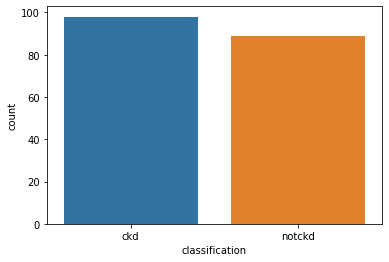

In [10]:
sns.countplot(df['classification'],label="Count")

<AxesSubplot:>

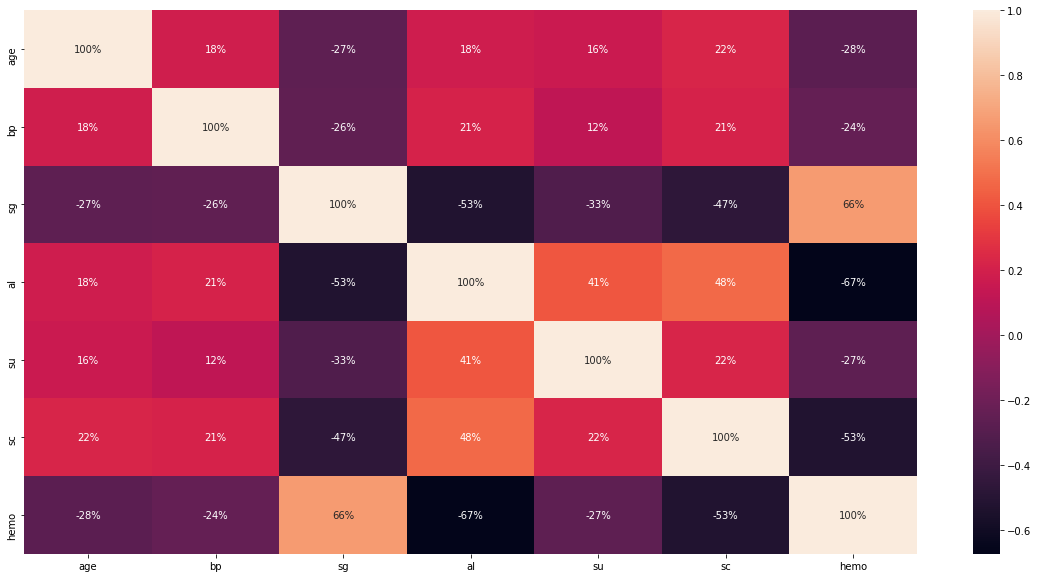

In [11]:
plt.figure(figsize=(20,10))  #This is used to change the size of the figure/ heatmap
sns.heatmap(df.corr(), annot=True, fmt='.0%')

In [12]:
print(retain)

['sg', 'age', 'bp', 'al', 'su', 'sc', 'hemo', 'pcv', 'wbcc', 'rbcc', 'htn', 'classification']


In [13]:
#Transform non-numeric columns into numerical columns
for column in df.columns:
        if df[column].dtype == np.number:
            continue
        df[column] = LabelEncoder().fit_transform(df[column])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  This is separate from the ipykernel package so we can avoid doing imports until


In [14]:
#Split the data
x= df[['sg', 'al', 'sc', 'pcv', 'htn']]
y = df['classification']

In [15]:
x

,sg,al,sc,pcv,htn
0,1.025,3.0,1.7,19,1
3,1.025,0.0,1.0,23,0
4,1.015,4.0,1.4,19,1
6,1.020,0.0,0.9,20,0
7,1.025,0.0,1.0,24,0
...,...,...,...,...,...
273,1.015,2.0,3.9,4,1
275,1.010,1.0,3.3,8,1
277,1.025,0.0,1.1,21,0
278,1.020,0.0,0.5,24,0


In [16]:
y

0      0
3      1
4      0
6      1
7      1
      ..
273    0
275    0
277    1
278    1
279    0
Name: classification, Length: 187, dtype: int64

In [18]:
#Split the data into 80% training and 20% testing 
x_train,  x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2,random_state=42)

In [19]:

print("Shape of training data: ", x_train.shape)
print("Shape of test data    : ", x_test.shape )


---------------------------------------------------------
Shape of training data:  (149, 5)
Shape of test data    :  (38, 5)
---------------------------------------------------------


In [21]:
x.shape[1]

5

In [22]:
#Build The model

model = Sequential()
model.add(Dense(128, input_dim=len(x.columns),kernel_initializer=k.initializers.random_normal(seed=13), activation="relu"))
model.add(Dense(64, kernel_initializer=k.initializers.random_normal(seed=13), activation="relu"))
model.add(Dense(32, kernel_initializer=k.initializers.random_normal(seed=13), activation="relu"))
model.add(Dense(1, activation="hard_sigmoid"))
model.add(Dense(1, activation='sigmoid'))

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               768       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 2         
Total params: 11,139
Trainable params: 11,139
Non-trainable params: 0
_________________________________________________________________


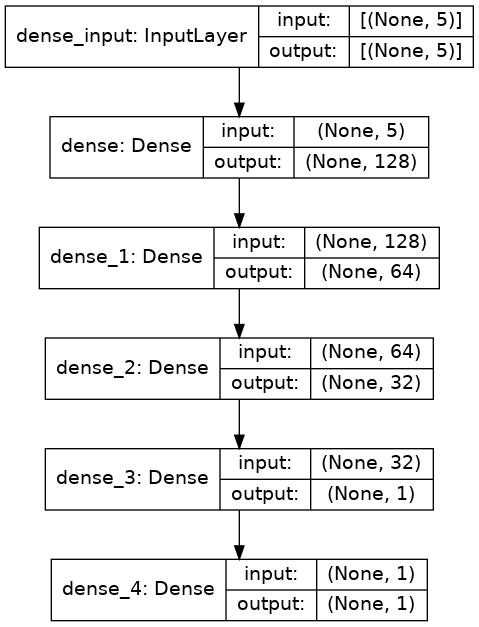

In [24]:
from tensorflow.keras.utils import plot_model
from IPython.display import Image
plot_model(model, to_file='convnet.png', show_shapes=True,show_layer_names=True)
Image(filename='convnet.png')

In [25]:
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

In [27]:
lrd = ReduceLROnPlateau(monitor = 'val_loss',
                         patience = 20,
                         verbose = 1,
                         factor = 0.75,
                         min_lr = 1e-10)

mcp = ModelCheckpoint('model.h5')

es = EarlyStopping(verbose=1, patience=20)

In [28]:
history = model.fit(x=x_train, y=y_train, epochs=40, callbacks=[lrd, mcp, es],batch_size=256, validation_split=0.1)

Epoch 1/40
1/1 [==============================] - 2s 2s/step - loss: 0.7896 - accuracy: 0.4776 - val_loss: 0.9027 - val_accuracy: 0.3333
Epoch 2/40
1/1 [==============================] - 0s 43ms/step - loss: 0.7868 - accuracy: 0.4776 - val_loss: 0.8987 - val_accuracy: 0.3333
Epoch 3/40
1/1 [==============================] - 0s 41ms/step - loss: 0.7843 - accuracy: 0.4776 - val_loss: 0.8938 - val_accuracy: 0.3333
Epoch 4/40
1/1 [==============================] - 0s 42ms/step - loss: 0.7816 - accuracy: 0.4776 - val_loss: 0.8889 - val_accuracy: 0.3333
Epoch 5/40
1/1 [==============================] - 0s 43ms/step - loss: 0.7790 - accuracy: 0.4776 - val_loss: 0.8840 - val_accuracy: 0.3333
Epoch 6/40
1/1 [==============================] - 0s 41ms/step - loss: 0.7762 - accuracy: 0.4776 - val_loss: 0.8791 - val_accuracy: 0.3333
Epoch 7/40
1/1 [==============================] - 0s 43ms/step - loss: 0.7733 - accuracy: 0.4776 - val_loss: 0.8744 - val_accuracy: 0.3333
Epoch 8/40
1/1 [=============

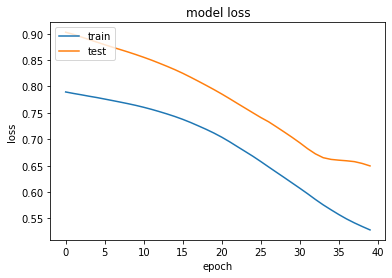

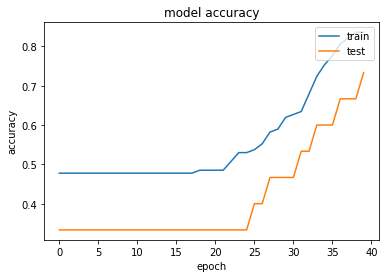

In [29]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# # summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

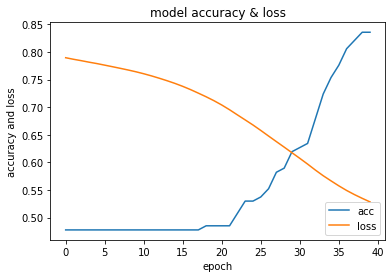

In [30]:
#Visualize the models accuracy and loss
plt.plot(history.history["accuracy"])
plt.plot(history.history["loss"])
plt.title("model accuracy & loss")
plt.ylabel("accuracy and loss")
plt.xlabel("epoch")
plt.legend(['acc', 'loss'], loc='lower right')
plt.show()

In [31]:
for model_file in glob.glob('model.h5'):
  print("Model file: ", model_file)
  model = load_model(model_file)
  pred = model.predict(x_test)
  pred = [1 if y>=0.5 else 0 for y in pred] #Threshold, transforming probabilities to either 0 or 1 depending if the probability is below or above 0.5
  scores = model.evaluate(x_test, y_test)
  print()
  print("Original  : {0}".format(", ".join([str(x) for x in y_test])))
  print()
    
    
    
  print("Predicted : {0}".format(", ".join([str(x) for x in pred])))
  print() 
  print("Scores    : loss = ", scores[0], " acc = ", scores[1])
  print("---------------------------------------------------------")
  print()

Model file:  model.h5
2/2 [==============================] - 0s 4ms/step - loss: 0.5053 - accuracy: 0.7895

Original  : 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1

Predicted : 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1

Scores    : loss =  0.5052527785301208  acc =  0.7894737124443054
---------------------------------------------------------



In [ ]:
import pickle
pickle.dump(model, open('model.pkl','wb'))
model=pickle.load(open('model.pkl','rb'))